# EPFL Machine Learning: Text Classification Project

## Part 2: Logistic Regression

In [29]:
%matplotlib inline
from Dataset import DataSet
from GloveModel import GloveModel
from Word2VecModel import Word2VecModel
import numpy as np
import matplotlib.pyplot as plt
from create_submission import create_csv_submission

## 2.1: Training Set with Word2Vec

In [2]:
word2vec = Word2VecModel(vector_size=20, word_min_count=5)
word2vec.load_model('model_word2vec_20.bin')

In [3]:
dataset = DataSet(word2vec)

In [4]:
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/train_pos_full.txt', '../data/train_neg_full.txt', delete_substr=deleted_substr,
                         training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

# Training Models:
## Logistic Regression with Word2Vec
- Word2Vec Sizes: [20, 40, 60, 80]
- Glove Sizes: [20, 40, 60, 80]

**5 Fold Cross Validation for Logistic Regression, W2V Embedding Size = 20**

- Word2Vec Size = 20 -> Optimum Parameters: C=1, max_iter=4000 -> Accuracy = 0.699 on test set, 0.699 on validation set
> Regularization parameter: [$10^{-4}$, ..., $10^{3}$] | Max iters: [4000, 8000, 12000] (default CV parameter)

In [9]:
np.random.seed(23)
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

In [27]:
#from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [31]:
from sklearn.model_selection import cross_val_score

c_s = np.logspace(-4,3,8)
max_iter = [4000,8000,12000]

In [50]:
for c in c_s:
    for iter_ in max_iter:
        scores = cross_val_score(LogisticRegression(C=c, random_state=23, solver='sag', max_iter=iter_, n_jobs=-1),
                                X_train_scaled, y_train, cv=5)
        print("c={}\titer={}\tavg. accuracy={}\tscores:{}".format(c, iter_, np.mean(scores), scores))

c=0.0001	iter=4000	avg. accuracy=0.6811162278052325	scores:[0.67995727 0.68310435 0.68106301 0.6814165  0.68004001]
c=0.0001	iter=8000	avg. accuracy=0.6811162278052325	scores:[0.67995727 0.68310435 0.68106301 0.6814165  0.68004001]
c=0.0001	iter=12000	avg. accuracy=0.6811162278052325	scores:[0.67995727 0.68310435 0.68106301 0.6814165  0.68004001]
1.0
c=0.001	iter=4000	avg. accuracy=0.6950918911168322	scores:[0.69401413 0.69672707 0.69613025 0.69499525 0.69359276]
c=0.001	iter=8000	avg. accuracy=0.6950918911168322	scores:[0.69401413 0.69672707 0.69613025 0.69499525 0.69359276]
c=0.001	iter=12000	avg. accuracy=0.6950918911168322	scores:[0.69401413 0.69672707 0.69613025 0.69499525 0.69359276]
1.0
c=0.01	iter=4000	avg. accuracy=0.6988119854271659	scores:[0.69782545 0.70067043 0.69992757 0.69847046 0.69716601]
c=0.01	iter=8000	avg. accuracy=0.6988119854271659	scores:[0.69782545 0.70067043 0.69992757 0.69847046 0.69716601]
c=0.01	iter=12000	avg. accuracy=0.6988119854271659	scores:[0.69782545

Text(0.5,0,'C = (1/$\\lambda$)')

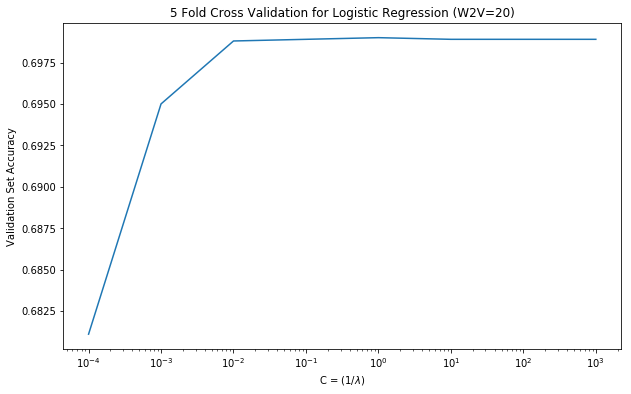

In [40]:
cv_accs = [0.6811, 0.695, 0.6988, 0.6989, 0.699, 0.6989, 0.6989, 0.6989]
plt.figure(figsize=(10,6))
plt.plot(c_s, cv_accs)
plt.xscale('log')
plt.title('5 Fold Cross Validation for Logistic Regression (W2V=20)')
plt.ylabel('Validation Set Accuracy')
plt.xlabel('C = (1/$\lambda$)')

***

**5 Fold Cross Validation for Logistic Regression, W2V Embedding Size = 40**

- Word2Vec Size = 40 -> Optimum Parameters: C=0.1, max_iter=4000 -> Accuracy = 0.715 on test set, 0.722 on validation set
> Regularization parameter: [$10^{-4}$, ..., $10^{3}$] | Max iters: [4000, 8000, 12000] (default CV parameter)

In [41]:
word2vec = Word2VecModel(vector_size=40, word_min_count=5)
word2vec.load_model('model_word2vec_40.bin')

In [42]:
dataset = DataSet(word2vec)

deleted_substr = ['#', '<user>', '<url>']

dataset.create_train_test('../data/train_pos_full.txt', 
                          '../data/train_neg_full.txt', 
                          delete_substr=deleted_substr,
                          training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

In [43]:
np.random.seed(23)
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 40)


In [44]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [48]:
model_40_accs = []

for c in c_s:
    scores = cross_val_score(LogisticRegression(C=c, random_state=23, solver='sag', max_iter=4000, n_jobs=-1),
                             X_train_scaled, y_train, cv=5)
    print("c={}\tavg. accuracy={}\tscores:{}".format(c, np.mean(scores), scores))
    model_40_accs.append(np.mean(scores))

c=0.0001	avg. accuracy=0.7115200074963784	scores:[0.71314875 0.71367093 0.70762625 0.71347972 0.70967439]
c=0.001	avg. accuracy=0.7192635016385578	scores:[0.7219638  0.72088943 0.71576108 0.72082829 0.71687491]
c=0.01	avg. accuracy=0.7219724448381666	scores:[0.7236884  0.72209985 0.72221733 0.72282299 0.71903366]
c=0.1	avg. accuracy=0.7220768810787428	scores:[0.72394649 0.72230392 0.72207328 0.72307508 0.71898564]
c=1.0	avg. accuracy=0.722070078697109	scores:[0.72393848 0.72231992 0.72205928 0.72307908 0.71895363]
c=10.0	avg. accuracy=0.7220768810883496	scores:[0.72393648 0.72230392 0.72206928 0.72309508 0.71897964]
c=100.0	avg. accuracy=0.7220784816437422	scores:[0.72393648 0.72230792 0.72207328 0.72309308 0.71898164]
c=1000.0	avg. accuracy=0.7220784816437422	scores:[0.72393648 0.72230792 0.72207328 0.72309308 0.71898164]


Text(0.5,0,'C = (1/$\\lambda$)')

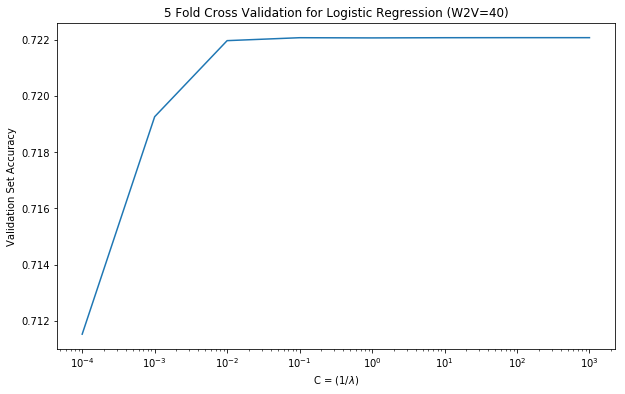

In [54]:
plt.figure(figsize=(10,6))
plt.plot(c_s, model_40_accs)
plt.xscale('log')
plt.title('5 Fold Cross Validation for Logistic Regression (W2V=40)')
plt.ylabel('Validation Set Accuracy')
plt.xlabel('C = (1/$\lambda$)')

***

**5 Fold Cross Validation for Logistic Regression, W2V Embedding Size = 60**

- Word2Vec Size = 60 -> Optimum Parameters: C=0.1, max_iter=4000 -> Accuracy = ~ on test set, 0.737 on validation set
> Regularization parameter: [$10^{-4}$, ..., $10^{3}$] | Max iters: [4000, 8000, 12000] (default CV parameter)

In [55]:
word2vec = Word2VecModel(vector_size=60, word_min_count=5)
word2vec.load_model('model_word2vec_60.bin')

In [56]:
dataset = DataSet(word2vec)

deleted_substr = ['#', '<user>', '<url>']

dataset.create_train_test('../data/train_pos_full.txt', 
                          '../data/train_neg_full.txt', 
                          delete_substr=deleted_substr,
                          training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

In [57]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 60)


In [58]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [59]:
model_60_accs = []

for c in c_s:
    scores = cross_val_score(LogisticRegression(C=c, random_state=23, solver='sag', max_iter=4000, n_jobs=-1),
                             X_train_scaled, y_train, cv=5)
    print("c={}, avg. accuracy={}, scores:{}".format(c, np.mean(scores), scores))
    model_60_accs.append(np.mean(scores))

c=0.0001, avg. accuracy=0.729112129386794, scores:[0.7309369  0.731211   0.72535042 0.73097784 0.72708448]
c=0.001, avg. accuracy=0.7362982303612267, scores:[0.73734312 0.737001   0.73636025 0.73700195 0.73378482]
c=0.01, avg. accuracy=0.7374762402766699, scores:[0.73858155 0.73819542 0.73746464 0.73814835 0.73499125]
c=0.1, avg. accuracy=0.7375238568912671, scores:[0.73853153 0.73821942 0.7376447  0.73825439 0.73496924]
c=1.0, avg. accuracy=0.7374682376213908, scores:[0.73832546 0.73817341 0.7376567  0.73825439 0.73493123]
c=10.0, avg. accuracy=0.7374646363545452, scores:[0.73833546 0.73816941 0.73766071 0.73823238 0.73492522]
c=100.0, avg. accuracy=0.7374630357983519, scores:[0.73833947 0.7381594  0.73766271 0.73823038 0.73492322]
c=1000.0, avg. accuracy=0.7374630357983519, scores:[0.73833947 0.7381594  0.73766271 0.73823038 0.73492322]


Text(0.5,0,'C = (1/$\\lambda$)')

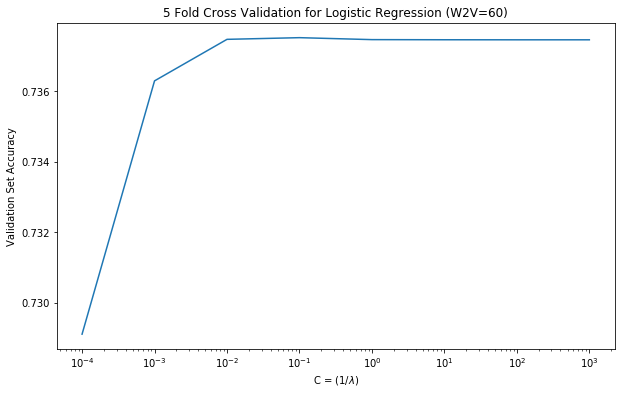

In [60]:
plt.figure(figsize=(10,6))
plt.plot(c_s, model_60_accs)
plt.xscale('log')
plt.title('5 Fold Cross Validation for Logistic Regression (W2V=60)')
plt.ylabel('Validation Set Accuracy')
plt.xlabel('C = (1/$\lambda$)')

***

**5 Fold Cross Validation for Logistic Regression, W2V Embedding Size = 80**

- Word2Vec Size = 80 -> Optimum Parameters: C=0.01, max_iter=4000 -> Accuracy = 0.741 on test set, 0.7455 on validation set
> Regularization parameter: [$10^{-4}$, ..., $10^{3}$] | Max iters: [4000, 8000, 12000] (default CV parameter)

In [61]:
word2vec = Word2VecModel(vector_size=80, word_min_count=5)
word2vec.load_model('model_word2vec_80.bin')

In [62]:
dataset = DataSet(word2vec)

deleted_substr = ['#', '<user>', '<url>']

dataset.create_train_test('../data/train_pos_full.txt', 
                          '../data/train_neg_full.txt', 
                          delete_substr=deleted_substr,
                          training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

In [63]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 80)


In [64]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [65]:
model_80_accs = []

for c in c_s:
    scores = cross_val_score(LogisticRegression(C=c, random_state=23, solver='sag', max_iter=4000, n_jobs=-1),
                             X_train_scaled, y_train, cv=5)
    print("c={}, avg. accuracy={}, scores:{}".format(c, np.mean(scores), scores))
    model_80_accs.append(np.mean(scores))

c=0.0001, avg. accuracy=0.7395781716383543, scores:[0.74112643 0.74141453 0.73672238 0.74095133 0.73767619]
c=0.001, avg. accuracy=0.7448984233132334, scores:[0.7459501  0.74702047 0.74189618 0.74636723 0.74325814]
c=0.01, avg. accuracy=0.7455330444198701, scores:[0.74618618 0.74747663 0.74303858 0.74660531 0.74435853]
c=0.1, avg. accuracy=0.745405800022779, scores:[0.74607614 0.74743061 0.74300457 0.74614915 0.74436853]
c=1.0, avg. accuracy=0.7453705877344905, scores:[0.74609015 0.7473846  0.74297856 0.74612314 0.7442765 ]
c=10.0, avg. accuracy=0.7453617846782296, scores:[0.74608214 0.74736059 0.74298056 0.74611514 0.74427049]
c=100.0, avg. accuracy=0.7453629850967756, scores:[0.74608415 0.74736059 0.74298056 0.74611714 0.7442725 ]
c=1000.0, avg. accuracy=0.7453629850967756, scores:[0.74608415 0.74736059 0.74298056 0.74611714 0.7442725 ]


Text(0.5,0,'C = (1/$\\lambda$)')

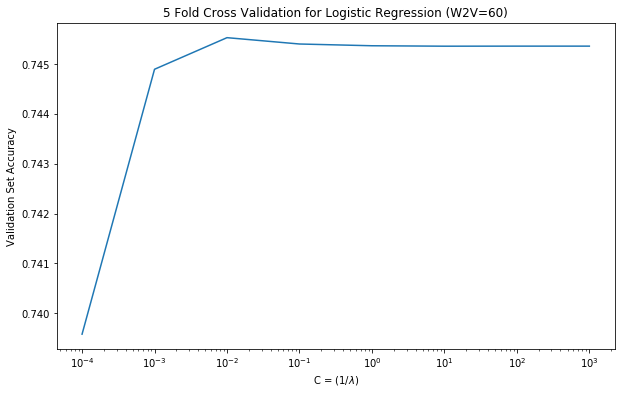

In [71]:
plt.figure(figsize=(10,6))
plt.plot(c_s, model_80_accs)
plt.xscale('log')
plt.title('5 Fold Cross Validation for Logistic Regression (W2V=60)')
plt.ylabel('Validation Set Accuracy')
plt.xlabel('C = (1/$\lambda$)')

***

# USE TEST SET PREDICTION HERE !

In [66]:
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/test_data.txt', '', delete_substr=deleted_substr, training=False)

Total lines (label = 1): 10000
10000 lines processed
Set completed.
X_test shape: (10000, 80)


In [67]:
X_test = np.load('X_test.npy')
X_test_scaled = sc.transform(X_test)

In [68]:
model = LogisticRegression(solver='sag', n_jobs=-1, C=0.01, max_iter=4000).fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [69]:
predictions[predictions == 0] = -1

In [70]:
create_csv_submission(range(1,10001), predictions, 'output.csv')